<a href="https://colab.research.google.com/github/Hjhirp/YOLO-Implementation-for-Mars-Anomaly-Detection-/blob/main/Notebook/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Omdena_Ahmedabad/After_Annotations'

/content/drive/MyDrive/Omdena_Ahmedabad/After_Annotations


In [ ]:
# !git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd darknet
# !chmod +x ./darknet
# !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/drive/MyDrive/Omdena_Ahmedabad/After_Annotations/darknet


In [ ]:
!chmod +x ./darknet

In [ ]:
!make

chmod +x *.sh


In [ ]:
# verify CUDA
# !/usr/local/cuda/bin/nvcc --version

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.637509), count: 13, class_loss = 4.303387, iou_loss = 8.184446, total_loss = 12.487834 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.784676), count: 9, class_loss = 1.224390, iou_loss = 1.127427, total_loss = 2.351818 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.839631), count: 2, class_loss = 0.138290, iou_loss = 0.090289, total_loss = 0.228580 
 total_bbox = 126009, rewritten_bbox = 0.249982 % 
]2;4039/14000: loss=1.3 hours left=17.0
 4039: 1.306896, 1.195364 avg loss, 0.001000 rate, 4.071828 seconds, 258496 images, 17.032828 hours left
Loaded: 0.000050 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.773053), count: 1, class_loss = 0.237768, iou_loss = 0.220697, total_loss = 0.458464 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00,

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-custom2.cfg backup/yolov4-custom_last.weights K.jpg -thresh 0.6 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    256 x 256 x   1 ->  256 x 256 x  32 0.038 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   3 route  1 		                           ->  128 x 128 x  64 
   4 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   5 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   6 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   8 conv  

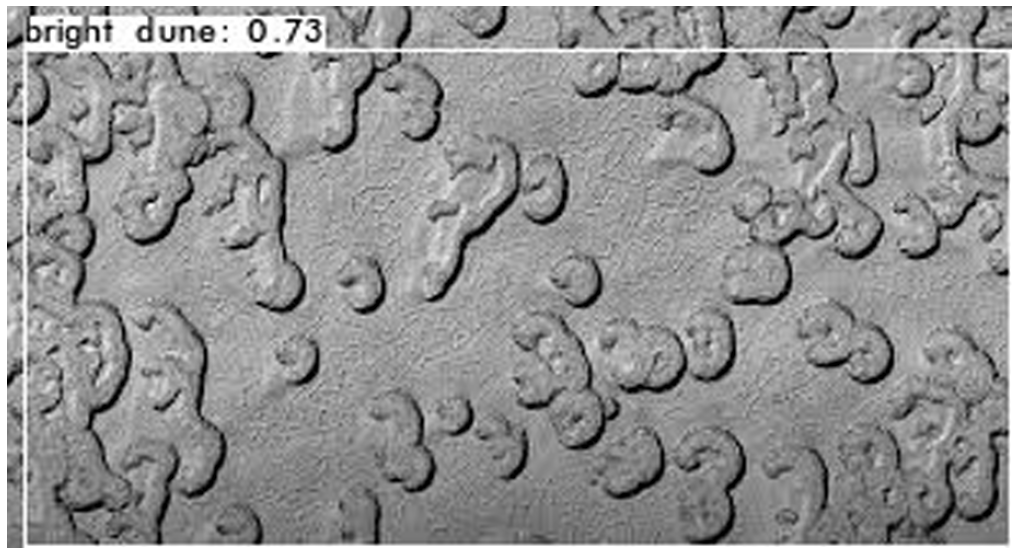

In [ ]:
imShow('predictions.jpg')

In [ ]:
# def imShow('predictions.jpg')
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()